In [1]:
import pandas as pd
print(pd.__version__)

1.2.3


In [2]:
import matplotlib
print(matplotlib.__version__)

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

3.3.4


In [3]:
import numpy as np
print(np.__version__)

1.19.2


In [4]:
# read the csv into the dataframe
# https://doi.org/10.13012/B2IDB-7291801_V1
# https://databank.illinois.edu/datafiles/xpwut/download
df = pd.read_csv('data/datafiles_2021-05-07.csv')
df.fillna('', inplace=True)
df.head()

,doi,pub_date,filename,file_format,num_bytes,total_downloads
0,10.13012/B2IDB-4900670_V1,2016-06-23,travel_times_2011.zip,application/zip,1335691587,470
1,10.13012/B2IDB-4900670_V1,2016-06-23,links.csv,text/csv,42001684,731
2,10.13012/B2IDB-4900670_V1,2016-06-23,README.txt,text/plain,5366,813
3,10.13012/B2IDB-4900670_V1,2016-06-23,license.txt,text/plain,28065,730
4,10.13012/B2IDB-4900670_V1,2016-06-23,travel_times_2013.zip,application/zip,1340668960,552


In [5]:
df["pub_date"] = pd.to_datetime(df["pub_date"])

In [6]:
# drop files from datasets with future (embargo) publication dates
print("before dropping files with future publication dates")
print(len(df))
print("number of files from datasets with future publication dates:")
print(sum(df['pub_date'] >= '2021-04-01'))
df = df[df['pub_date'] < '2021-04-01']
print("after dropping files with future publication dates")
print(len(df))
df.head()


before dropping files with future publication dates
4525
number of files from datasets with future publication dates:
113
after dropping files with future publication dates
4412


,doi,pub_date,filename,file_format,num_bytes,total_downloads
0,10.13012/B2IDB-4900670_V1,2016-06-23,travel_times_2011.zip,application/zip,1335691587,470
1,10.13012/B2IDB-4900670_V1,2016-06-23,links.csv,text/csv,42001684,731
2,10.13012/B2IDB-4900670_V1,2016-06-23,README.txt,text/plain,5366,813
3,10.13012/B2IDB-4900670_V1,2016-06-23,license.txt,text/plain,28065,730
4,10.13012/B2IDB-4900670_V1,2016-06-23,travel_times_2013.zip,application/zip,1340668960,552


In [7]:
# gb is number of bytes in a gigabyte
gb = 1024**3

In [8]:
# add a column to the dataframe for the file size catagory code
conditions = [
    (df['num_bytes'] <= 4*gb),
    (df['num_bytes'] > 4*gb) & (df['num_bytes'] <= 15*gb),
    (df['num_bytes'] > 15*gb) & (df['num_bytes'] <= 50*gb),
    (df['num_bytes'] > 50*gb)
]
outputs = [
    '0-4 GB', '4-15 GB', '15-50 GB', '50+ GB'
]
df['size_code'] = np.select(conditions, outputs, 'Other')
df.head()

,doi,pub_date,filename,file_format,num_bytes,total_downloads,size_code
0,10.13012/B2IDB-4900670_V1,2016-06-23,travel_times_2011.zip,application/zip,1335691587,470,0-4 GB
1,10.13012/B2IDB-4900670_V1,2016-06-23,links.csv,text/csv,42001684,731,0-4 GB
2,10.13012/B2IDB-4900670_V1,2016-06-23,README.txt,text/plain,5366,813,0-4 GB
3,10.13012/B2IDB-4900670_V1,2016-06-23,license.txt,text/plain,28065,730,0-4 GB
4,10.13012/B2IDB-4900670_V1,2016-06-23,travel_times_2013.zip,application/zip,1340668960,552,0-4 GB


In [9]:
size_labels, size_counts = np.unique(df['size_code'], return_counts=True)
print(size_labels)
print(size_counts)
total = len(df)
print(total)

['0-4 GB' '15-50 GB' '4-15 GB' '50+ GB']
[4249   65   82   16]
4412


In [10]:
#zip
z = list(zip(size_counts, size_labels))
#sort by size_count
z.sort(reverse=True)
# unzip
sorted_params = [[ i for i, j in z ],[ j for i, j in z ]]
size_counts = sorted_params[0]
size_labels = sorted_params[1]
print(size_counts)
print(size_labels)

[4249, 82, 65, 16]
['0-4 GB', '4-15 GB', '15-50 GB', '50+ GB']


[]

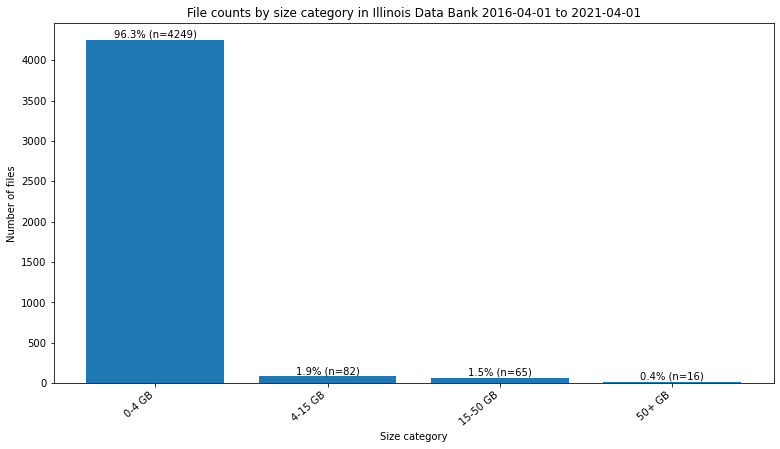

In [11]:
fig=plt.figure(figsize=(10,5))
ax=fig.add_axes([0,0,1,1])
ax.bar(size_labels,size_counts)
ax.set_ylabel('Number of files')
ax.set_xlabel('Size category')
ax.set_title('File counts by size category in Illinois Data Bank 2016-04-01 to 2021-04-01')

rects = ax.patches

percentages = ["{:.1%}".format(float(x)/float(total)) + " (n=" + str(x) + ")" for x in size_counts]

for rect, label in zip(rects, percentages):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 5, label,
            ha='center', va='bottom')

# rotate_labels
for label in ax.get_xticklabels():
    label.set_rotation(40)
    label.set_horizontalalignment('right')

ax.plot()

In [12]:
df['size_code'].value_counts(normalize=True) * 100

0-4 GB      96.305530
4-15 GB      1.858568
15-50 GB     1.473255
50+ GB       0.362647
Name: size_code, dtype: float64

In [13]:
num_small = sum(df['num_bytes'] <= 4*gb)
num_large = sum(df['num_bytes'] > 4*gb)
total_num_files = len(df)
print(num_small)
print(num_large)
print(num_small/total_num_files)
print(num_large/total_num_files)
print(total_num_files)

4249
163
0.9630553037171351
0.03694469628286491
4412


In [14]:
# last publication date in dataframe -- includes embargo
df["pub_date"].max()

Timestamp('2021-03-31 00:00:00')

In [15]:
# first publication date in dataframe
df["pub_date"].min()

Timestamp('2016-05-16 00:00:00')

In [16]:
# create a numpy.ndarray from the num_bytes column for convenience
file_size_column = df.loc[:,'num_bytes']
file_sizes = file_size_column.values

# calculate total GB in small files vs. large files
a = file_sizes[(gb*4 >= file_sizes) ].sum()
b = file_sizes[(gb*4 < file_sizes) ].sum()
print("Total GB in files 4GB or smaller: " + str(a/gb))
print("Total GB in files larger than 4GB: " + str(b/gb))
print("Total GB in all files: " + str((a+b)/gb))

Total GB in files 4GB or smaller: 983.6914562191814
Total GB in files larger than 4GB: 5982.069452524185
Total GB in all files: 6965.760908743367


In [17]:
df["size_in_gb"] = round(df["num_bytes"]/gb, 1)

<bound method Axes.plot of <matplotlib.axes._axes.Axes object at 0x7ff1e4c140a0>>

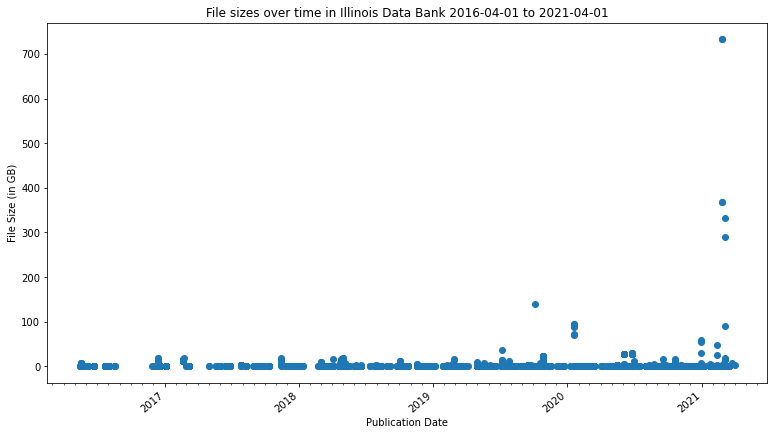

In [18]:
# visualize mostly small files, but more and more large files
fig=plt.figure(figsize=(10,5))
ax=fig.add_axes([0,0,1,1])
df["size_in_gb"] = df["num_bytes"]/gb
df=df.sort_values("pub_date")
ax.scatter(df.pub_date, df.size_in_gb)
ax.set_ylabel("File Size (in GB)")
ax.set_xlabel("Publication Date")
ax.set_title('File sizes over time in Illinois Data Bank 2016-04-01 to 2021-04-01')

# Major ticks every year
ax.xaxis.set_major_locator(mdates.AutoDateLocator())

# Minor ticks every month
ax.xaxis.set_minor_locator(mdates.MonthLocator())

# rotate_labels
for label in ax.get_xticklabels():
    label.set_rotation(40)
    label.set_horizontalalignment('right')

ax.plot

In [19]:
file_type_column = df.loc[:,'file_format']
file_types = file_type_column.values

In [20]:
# for use in later step of manually coding formats into categories
np.unique(file_types)

array(['', 'application/msword',
       'application/netcdf, application/x-netcdf',
       'application/octet-stream', 'application/pdf', 'application/rtf',
       'application/vnd.ms-excel',
       'application/vnd.oasis.opendocument.spreadsheet',
       'application/x-7z-compressed', 'application/x-executable',
       'application/x-gzip', 'application/x-hdf',
       'application/x-rar-compressed', 'application/x-tar',
       'application/x-xz', 'application/zip', 'image/bmp', 'image/jpeg',
       'image/png', 'image/tiff', 'text/csv', 'text/html',
       'text/html; charset=KOI8-R', 'text/html; charset=windows-1252',
       'text/plain', 'text/x-asm', 'text/x-c', 'text/x-c++',
       'text/x-java', 'text/x-python', 'text/x-shellscript', 'text/xml',
       'video/quicktime', 'video/x-msvideo'], dtype=object)

In [21]:
# describe features grouped by file_format
format_groups = df.groupby(by=["file_format"]).sum()
format_groups

,num_bytes,total_downloads,size_in_gb
file_format,,,
,41951344509,2337,39.070234
application/msword,336764,3112,0.000314
"application/netcdf, application/x-netcdf",3379339247024,18726,3147.254928
application/octet-stream,249273351065,58852,232.153899
application/pdf,119242387,14487,0.111053
application/rtf,196753,351,0.000183
application/vnd.ms-excel,526816972,16692,0.490637
application/vnd.oasis.opendocument.spreadsheet,1493886,1317,0.001391
application/x-7z-compressed,4955957097,1018,4.615595


In [22]:
# calculate counts for uncategorized file_format values
unique_elements, counts_elements = np.unique(file_types, return_counts=True)
print(unique_elements)
print(counts_elements)

['' 'application/msword' 'application/netcdf, application/x-netcdf'
 'application/octet-stream' 'application/pdf' 'application/rtf'
 'application/vnd.ms-excel'
 'application/vnd.oasis.opendocument.spreadsheet'
 'application/x-7z-compressed' 'application/x-executable'
 'application/x-gzip' 'application/x-hdf' 'application/x-rar-compressed'
 'application/x-tar' 'application/x-xz' 'application/zip' 'image/bmp'
 'image/jpeg' 'image/png' 'image/tiff' 'text/csv' 'text/html'
 'text/html; charset=KOI8-R' 'text/html; charset=windows-1252'
 'text/plain' 'text/x-asm' 'text/x-c' 'text/x-c++' 'text/x-java'
 'text/x-python' 'text/x-shellscript' 'text/xml' 'video/quicktime'
 'video/x-msvideo']
[  81   20  171  449   66    5  116    3    5    1  369  333   14   11
    6  479    2    2    4  113  576   14    2    1 1505    1    3    4
   24   10    5    4   11    2]


In [23]:
# add format_code column to dataframe based on lists of file formats
text_formats =  ['text/html; charset=KOI8-R',
 'text/html; charset=windows-1252', 'text/plain', 'text/x-asm', 'text/x-c'
 'text/x-c++', 'text/x-java', 'text/x-perl', 'text/x-python'
 'text/x-shellscript', 'text/xml']

archive_formats = ['application/x-7z-compressed',
 'application/x-gzip', 'application/x-rar-compressed'
 'application/x-tar', 'application/x-xz', 'application/zip']

conditions = [
    np.isin(df['file_format'], text_formats),
    np.isin(df['file_format'], archive_formats)
]
outputs = [
    'Text', 'Archive'
]
df['format_code'] = np.select(conditions, outputs, 'Other')
df.head()


,doi,pub_date,filename,file_format,num_bytes,total_downloads,size_code,size_in_gb,format_code
755,10.13012/B2IDB-4602893_V1,2016-05-16,dataset_readme.txt,text/plain,1800,302,0-4 GB,0.000002,Text
756,10.13012/B2IDB-4602893_V1,2016-05-16,AmbB_and_AmbE_Newick_2015-02-10.txt,text/plain,1503,288,0-4 GB,0.000001,Text
754,10.13012/B2IDB-4602893_V1,2016-05-16,AmbB_and_AmbE_Sequence_Set_2015-02-10.txt,text/plain,13154,305,0-4 GB,0.000012,Text
753,10.13012/B2IDB-4602893_V1,2016-05-16,AmbB_and_AmbE_2015-02-10.tiff,image/tiff,249016,420,0-4 GB,0.000232,Other
451,10.13012/J8PN93H8,2016-05-19,FOIL2011.zip,application/zip,8595168571,1196,4-15 GB,8.004875,Archive


In [24]:
# generate pie chart visualizing instances of archive file types as a part of all file type categories
type_labels, type_counts = np.unique(df['format_code'], return_counts=True)
type_colors = ['#F47F24', '#939CC2', '#A17724']
print(type_labels)
print(typ_counts)
explode = (0.1, 0.02, 0.02)
fig1, ax1 = plt.subplots()
ax1.pie(counts,
        explode=explode,
        labels=type_labels,
        colors=type_colors,
        autopct='%1.1f%%',
        shadow=True,
        startangle=90)
ax1.axis('equal')

plt.show()

['Archive' 'Other' 'Text']


NameError: name 'typ_counts' is not defined